# EDA

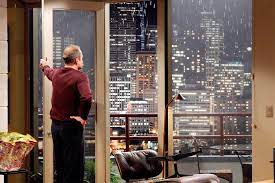

# Buyer
## High budget, wants to show off, timing within a month, waterfront, renovated, high grades year

# Column Names and descriptions for King County Data Set

| Column name                | Description of column |
| -------------------        | --------------------| 
| id                         | unique identified for a house |
|date                        | house was sold  |
|price                       | is prediction target |
|bedrooms                    | # of bedrooms |
|bathrooms                   | # of bathrooms |
|sqft_living                 | footage of the home |
|sqft_lots                   | footage of the lot |
|floorsTot                   | floors (levels) in house |
|waterfro                    | House which has a view to a waterfront |
|vi                          |Has been viewed |
|conditi                     | How good the condition is ( Overall ) |
|gra                         |overall grade given to the housing unit, based on King County grading system |
|sqft_abo                    |square footage of house apart from basement |
|sqft_baseme                 | square footage of the basement |
|yr_bui                      | Built Year |
|yr_renovat                  | Year when house was renovated |
|zipco                       | zip |
|l                           | Latitude coordinate |
|lo                          | Longitude coordinate |
|sqft_living                 | The square footage of interior housing living space for the nearest 15 neighbors |
|sqft_lot                    | The square footage of the land lots of the nearest 15 neighbors |

Stakeholder is a Buyer who wants to ----

## Importing libraries and Data
- Required libraries are imported 
- Data is loaded
- First look into the data 

In [67]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv('./data/King_County_House_prices_dataset.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503


## Data Cleaning
### Check for data types, duplicates, NaNs
For each of the column data types are looked into and transformed into corrected types wherever required
- date from object to date-time format
- 

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [5]:
# change "date" dtype to datetime with format %d/%m/%Y
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df['month'] = df['date'].dt.month


In [13]:
# sqft_basement has object/str data type which should not be the case, so we will convert it into float
type(df['sqft_basement'][0])
# replacing the '?' with NaN
df['sqft_basement'] = df.sqft_basement.replace('?',np.NaN)
# now changing the data type from object/string to float
df = df.astype({'sqft_basement': float})

In [9]:
#check for the duplicates
df.duplicated().value_counts()
#There aren't any duplicates

False    21597
dtype: int64

# Questions?  Assumptions! Solutions.
### Questions 
  - How many houses fall in the category of High budget?
  - Houses with waterfront are all expensive ?
  - How grades affect the rise in price for a House ?
  - Are there renovated houses available ?

### Assumptions
 - Houses are expensive in the city center and near the waterfront.
 - Prices are higher for houses with waterfront.
 - Grades determining the quality of material used in the house leads to higher price.
 - Houses built in 2000's or renovated in the same years are expected to cost more.

### Solutions


# Data analysis
### Statistics
- Lets have a look into the statistics 

In [16]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,...,21597.000,21143.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,...,1788.597,291.852,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284,6.574
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,...,827.760,442.498,29.375,399.946,53.513,0.139,0.141,685.230,27274.442,3.115
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,1.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,4.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,...,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,6.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,...,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,9.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,9410.000,4820.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,12.000


Some insights into the Data:
- Focus is mainly on the **price, grade, renovation** and into Zip codes for finding the time frame
- There are total of 21597 entries
- Average cost of the house is 540296$ while the max is 7700000$
- Waterfront is categorical with 1.0 and without 0.0 (count is different)
- Grade has max value of 13 with an average of 7.0
- Renovation done latest is in 2015
- There seem to be an anomaly in the bedrooms

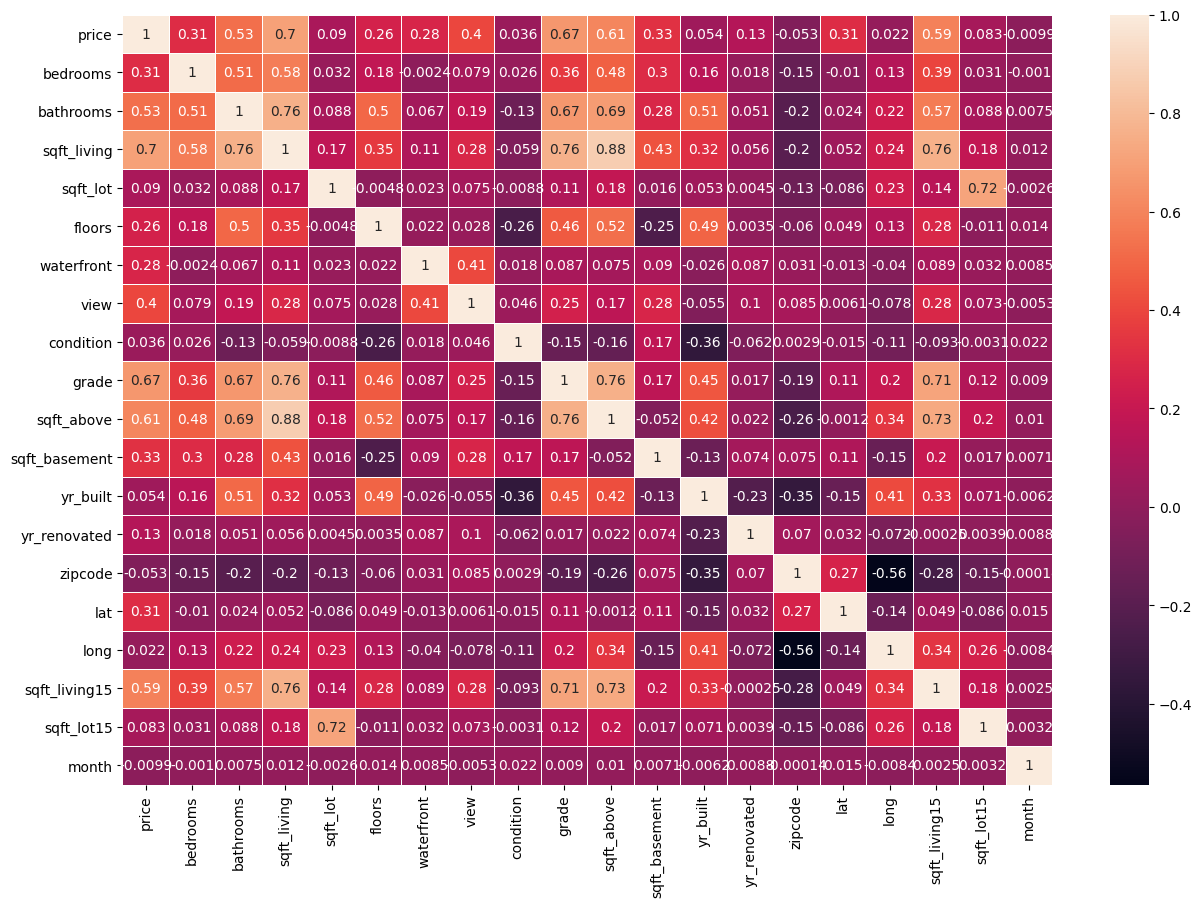

In [29]:
# Correlation matrix

df_corr = df.corr().iloc[1:,1:]

plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,annot=True, linewidths = 0.5);

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

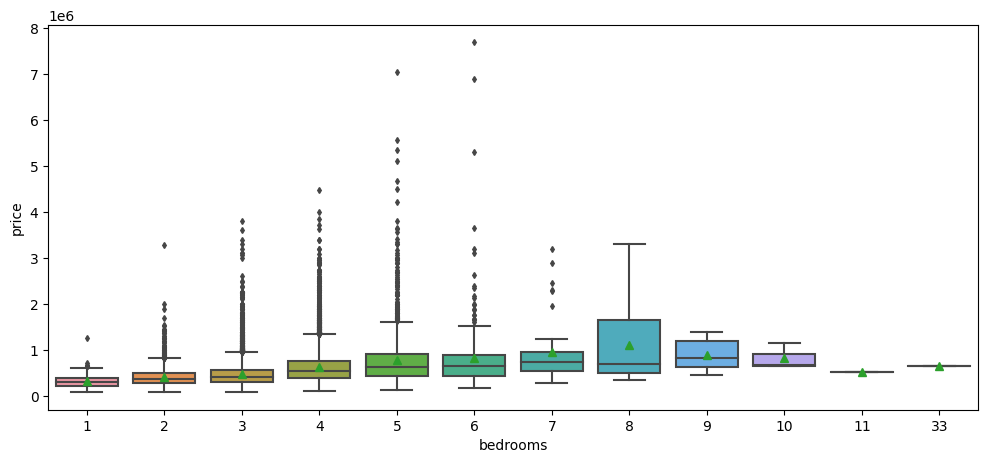

In [41]:
#Variable 'bedrooms'
plt.figure(figsize=(12,5))
sns.boxplot(x = 'bedrooms', y = 'price', data = df, width = 0.8, showmeans = True, fliersize = 3);

In [46]:
df.query("bedrooms == 33") # check for its index
df.drop(15856, axis=0, inplace = True) # drop the row 
# shape of the df reduces to (21596, 22)

**Price analysis for the houses having Waterfront**

In [49]:
# sort the prices from most expensive 
df.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
7245,6762700020,2014-10-13,7700000.000,6,8.000,12050,27600,2.500,0.000,3.000,...,8570,3480.000,1910,1987.000,98102,47.630,-122.323,3940,8800,10
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6
9245,9208900037,2014-09-19,6890000.000,6,7.750,9890,31374,2.000,0.000,4.000,...,8860,1030.000,2001,0.000,98039,47.630,-122.240,4540,42730,9
4407,2470100110,2014-08-04,5570000.000,5,5.750,9200,35069,2.000,0.000,0.000,...,6200,3000.000,2001,NaN,98039,47.629,-122.233,3560,24345,8
1446,8907500070,2015-04-13,5350000.000,5,5.000,8000,23985,2.000,0.000,4.000,...,6720,1280.000,2009,0.000,98004,47.623,-122.220,4600,21750,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,2014-05-08,82500.000,2,1.000,520,22334,1.000,0.000,0.000,...,520,0.000,1951,0.000,98168,47.480,-122.296,1572,10570,5
8267,3883800011,2014-11-05,82000.000,3,1.000,860,10426,1.000,0.000,0.000,...,860,0.000,1954,0.000,98146,47.499,-122.341,1140,11250,11
16184,3028200080,2015-03-24,81000.000,2,1.000,730,9975,1.000,NaN,0.000,...,730,0.000,1943,0.000,98168,47.481,-122.315,860,9000,3
465,8658300340,2014-05-23,80000.000,1,0.750,430,5050,1.000,NaN,0.000,...,430,0.000,1912,0.000,98014,47.650,-121.909,1200,7500,5


In [56]:
df.waterfront.value_counts()

0.000    19074
1.000      146
Name: waterfront, dtype: int64

In [59]:
#keep only those values which have waterfront
wf_df = df.query('waterfront == 1.0')#.sort_values('price', ascending = False, inplace = True)
#sort the df from highest price to lowest
wf_df.sort_values('price', ascending = False, inplace = True)
wf_df

In [65]:
#wf_df # 146 rows × 22 columns

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6
1313,7558700030,2015-04-13,5300000.000,6,6.000,7390,24829,2.000,1.000,NaN,...,5000,2390.000,1991,0.000,98040,47.563,-122.210,4320,24619,4
1162,1247600105,2014-10-20,5110000.000,5,5.250,8010,45517,2.000,1.000,4.000,...,5990,2020.000,1999,0.000,98033,47.677,-122.211,3430,26788,10
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,4820,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454,6
2624,7738500731,2014-08-15,4500000.000,5,5.500,6640,40014,2.000,1.000,4.000,...,6350,290.000,2004,0.000,98155,47.749,-122.280,3030,23408,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11544,2013802030,2014-09-11,357000.000,3,2.000,2460,53882,1.000,1.000,4.000,...,2460,0.000,1955,0.000,98198,47.381,-122.325,2660,32625,9
6096,222029026,2014-09-17,340000.000,2,0.750,1060,48292,1.000,1.000,2.000,...,560,500.000,1947,0.000,98070,47.428,-122.511,750,80201,9
16556,2923039243,2014-11-13,340000.000,4,1.000,1200,11834,1.000,1.000,3.000,...,1200,0.000,1972,0.000,98070,47.456,-122.443,1670,47462,11
1166,3523029041,2014-10-09,290000.000,2,0.750,440,8313,1.000,1.000,3.000,...,440,0.000,1943,0.000,98070,47.434,-122.512,880,26289,10


In [79]:
fig = px.scatter_mapbox(wf_df, lat="lat", lon="long", size_max=10, zoom=8, color_continuous_scale="bluered",
    color="price", size="price")
fig.update_layout(mapbox_style="open-street-map",title="Houses with Waterfront",title_font_size= 20)
fig.show();

**Let's look into grades**
- There isn't any null values in the *grade* col of wf_df dataframe
- Let us look at the renovated year, which has 25 NaNs

In [113]:
#wf_df.query('grade.isna()')
#0 rows × 22 columns
#wf_df.query('yr_renovated.isna()')
#25 rows × 22 columns
wf_df["yr_renovated"].fillna(0, inplace=True)

In [115]:
wf_df["yr_renovated"]

3910    2001.000
1313       0.000
1162       0.000
8085    2009.000
2624       0.000
          ...   
11544      0.000
6096       0.000
16556      0.000
1166       0.000
18261      0.000
Name: yr_renovated, Length: 146, dtype: float64

In [120]:
#wf_df['grade'].unique()
# array([11, 12, 10,  8,  9,  7,  6,  5])
df_fin = wf_df.query('yr_renovated != 0').sort_values('grade', ascending = False)

In [122]:
df_fin.head()
#146 rows
#29 rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
15678,6117502230,2014-12-01,1640000.000,3,3.500,4660,21164,2.000,1.000,4.000,...,4660,0.000,1975,1990.000,98166,47.442,-122.354,3140,24274,12
8085,1924059029,2014-06-17,4670000.000,5,6.750,9640,13068,1.000,1.000,4.000,...,4820,4820.000,1983,2009.000,98040,47.557,-122.210,3270,10454,6
3910,9808700762,2014-06-11,7060000.000,5,4.500,10040,37325,2.000,1.000,2.000,...,7680,2360.000,1940,2001.000,98004,47.650,-122.214,3930,25449,6
18185,3625059152,2014-12-30,3300000.000,3,3.250,4220,41300,1.000,1.000,4.000,...,2460,1760.000,1958,1987.000,98008,47.608,-122.110,3810,30401,12
2862,4114601570,2014-11-18,3600000.000,3,3.250,5020,12431,2.000,1.000,4.000,...,3420,1600.000,1941,2002.000,98144,47.593,-122.287,3680,12620,11


In [126]:
fig = px.scatter_mapbox(df_fin, lat="lat", lon="long", size_max=15, zoom=8, color_continuous_scale="bluered",
    color="yr_renovated", size="price")
fig.update_layout(mapbox_style="open-street-map",title="Houses with Waterfront",title_font_size= 20)
fig.show();

In [137]:
df_lim = df_fin[['date', 'price', 'waterfront', 'grade', 'condition', 'yr_built', 'yr_renovated', 'zipcode']]

In [148]:
df_lim.query('grade > 9')
#f_group = df_lim[['grade','condition','yr_renovated']].groupby(['grade','condition','yr_renovated']).size()
#df_group

,date,price,waterfront,grade,condition,yr_built,yr_renovated,zipcode
15678,2014-12-01,1640000.000,1.000,12,3,1975,1990.000,98166
8085,2014-06-17,4670000.000,1.000,12,3,1983,2009.000,98040
3910,2014-06-11,7060000.000,1.000,11,3,1940,2001.000,98004
18185,2014-12-30,3300000.000,1.000,11,4,1958,1987.000,98008
2862,2014-11-18,3600000.000,1.000,10,3,1941,2002.000,98144
8775,2015-03-06,1800000.000,1.000,10,4,1933,1989.000,98006


In [132]:
fig = px.scatter_mapbox(df_fin, lat="lat", lon="long",
                  color_continuous_scale="bluered", 
                  size_max=10, zoom=8, 
                  color="price", size="price",hover_name="grade")
fig.update_layout(mapbox_style="open-street-map",title="House recommendations for Jennifer Montgomery",title_font_size= 30)
fig.show()